<a href="https://colab.research.google.com/github/ThulinaWickramasinghe/DL_Lab2/blob/main/MLP_with_MNIST_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt
import numpy as np


Load the MNIST dataset

In [ ]:
(train_data,train_target),(test_data,test_target) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


Visualize the dataset

Target labels:  [0 4 1 5 7 7 1 0 6 7 3 6 7 0 2 4 0 5 8 4 9 6 4 7 9 6 8 4 8 2 1 6 7 7 0 4 5
 6 6 5 3 6 6 4 8 1 2 7 3 5 1 7 1 5 6 0 7 0 4 1 6 5 4 4 2 9 0 7 3 5 4 6 8 4
 6 9 5 7 3 1 9 0 8 0 8 9 3 6 6 5 0 2 5 4 3 6 7 1 2 0]


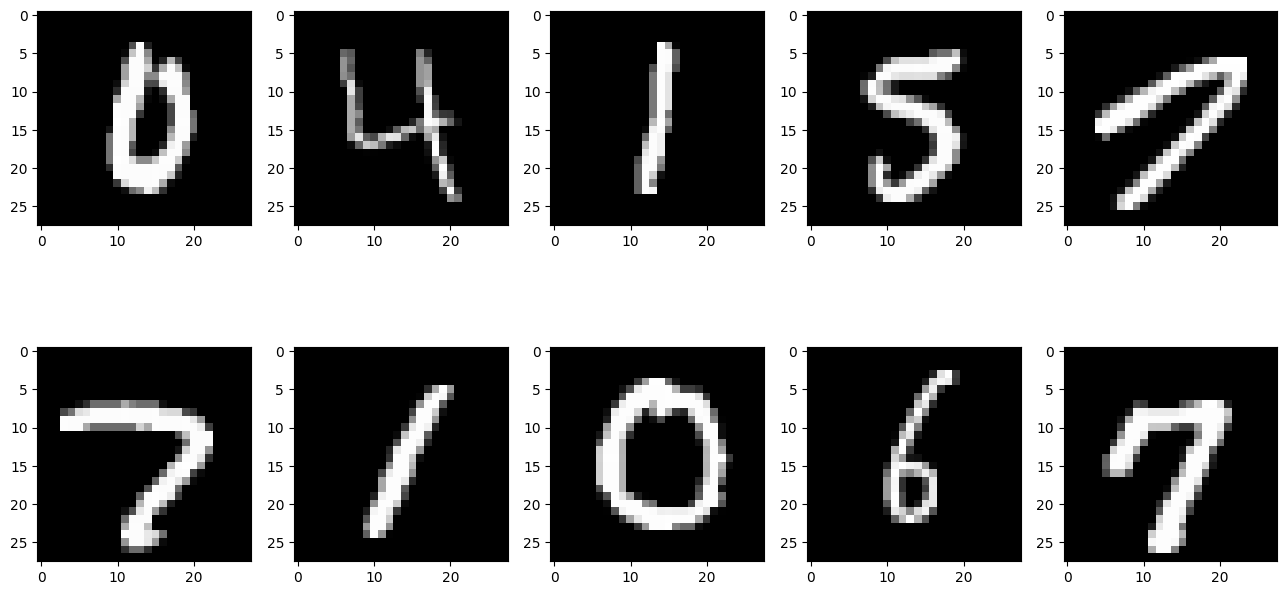

In [ ]:
fig, axs = plt.subplots(2, 5, figsize=(16,8))
random_numbers = np.random.randint(0, 60000, 100)
print('Target labels: ',train_target[random_numbers])
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(train_data[random_numbers[idx]],cmap='gray')
plt.show()

Pre-processing stage

In [ ]:
new_train_data = train_data/255.0
new_test_data=test_data/255.0

new_train_target = to_categorical(train_target)
new_test_target = to_categorical(test_target)

Create the Model architecture

In [ ]:
model=Sequential()

model.add(Flatten(input_shape=(28,28)))

model.add(Dense(64,activation='relu'))
model.add(Dense(64,input_dim=64,activation='relu'))
model.add(Dense(32,input_dim=64,activation='relu'))
model.add(Dense(10,input_dim=32,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 56,810
Trainable params: 56,810
Non-trainable params: 0
_________________________________________________________________


Train the model

In [ ]:
train_info = model.fit(new_train_data , new_train_target , epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2951 - accuracy: 0.9120
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1253 - accuracy: 0.9621
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0899 - accuracy: 0.9722
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0728 - accuracy: 0.9776
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0583 - accuracy: 0.9816
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0494 - accuracy: 0.9842
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0420 - accuracy: 0.9864
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0370 - accuracy: 0.9877
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0319 - accuracy: 0.9894
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.030

Plot the loss and accuracy graphs

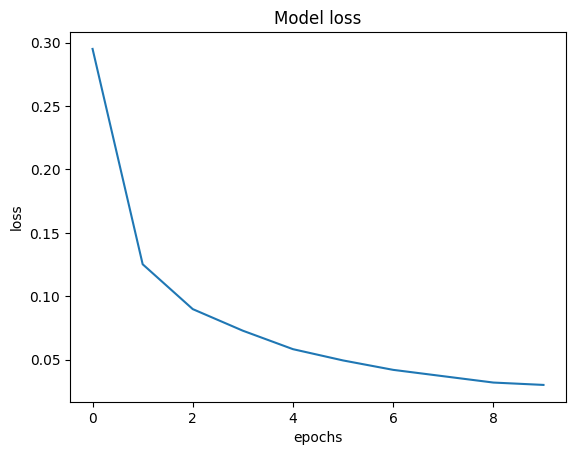

In [ ]:
plt.plot(train_info.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Model loss')
plt.show()

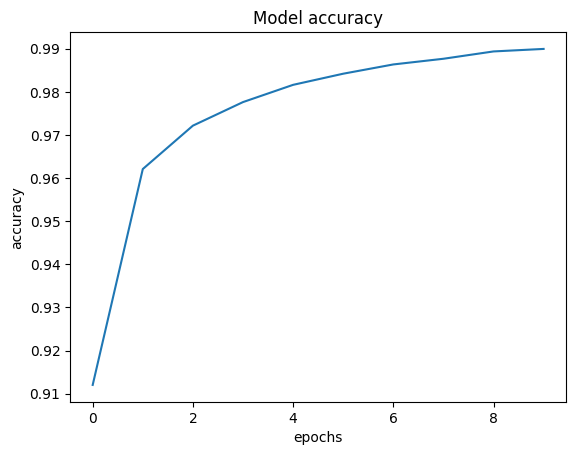

In [ ]:
plt.plot(train_info.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Model accuracy')
plt.show()

Test the performance of Model

In [ ]:
loss, acc = model.evaluate(new_test_data , new_test_target)
print(f'Loss of the Test dataset is: {loss}\nAccuracy of the test dataset is: {acc}')

313/313 [==============================] - 0s 1ms/step - loss: 0.0983 - accuracy: 0.9753
Loss of the Test dataset is: 0.09829973429441452
Accuracy of the test dataset is: 0.9753000140190125


Save the model weights

In [ ]:
model.save_weights('MNIST_WEIGHTS_V1.h5')